# <b><span style='color:#F1A424'>AutoML - Binary Classification - Wine Quality Prediction </span> </b>

### Disclaimer
Please note, the Vantage Functions via SQLAlchemy feature is a preview/beta code release with limited functionality (the “Code”). As such, you acknowledge that the Code is experimental in nature and that the Code is provided “AS IS” and may not be functional on any machine or in any environment. TERADATA DISCLAIMS ALL WARRANTIES RELATING TO THE CODE, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTIES AGAINST INFRINGEMENT OF THIRD-PARTY RIGHTS, MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.

TERADATA SHALL NOT BE RESPONSIBLE OR LIABLE WITH RESPECT TO ANY SUBJECT MATTER OF THE CODE UNDER ANY CONTRACT, NEGLIGENCE, STRICT LIABILITY OR OTHER THEORY 
    (A) FOR LOSS OR INACCURACY OF DATA OR COST OF PROCUREMENT OF SUBSTITUTE GOODS, SERVICES OR TECHNOLOGY, OR 
    (B) FOR ANY INDIRECT, INCIDENTAL OR CONSEQUENTIAL DAMAGES INCLUDING, BUT NOT LIMITED TO LOSS OF REVENUES AND LOSS OF PROFITS. TERADATA SHALL NOT BE RESPONSIBLE FOR ANY MATTER BEYOND ITS REASONABLE CONTROL.

Notwithstanding anything to the contrary: 
    (a) Teradata will have no obligation of any kind with respect to any Code-related comments, suggestions, design changes or improvements that you elect to provide to Teradata in either verbal or written form (collectively, “Feedback”), and 
    (b) Teradata and its affiliates are hereby free to use any ideas, concepts, know-how or techniques, in whole or in part, contained in Feedback: 
        (i) for any purpose whatsoever, including developing, manufacturing, and/or marketing products and/or services incorporating Feedback in whole or in part, and 
        (ii) without any restrictions or limitations, including requiring the payment of any license fees, royalties, or other consideration. 

## <b> Problem overview:</b>
    

**Dataset used : Wine Quality Dataset**

**Features**:

- `fixed acidity`: fixed acidity of wine.
- `volatile acidity`: volatile acidity of wine.
- `citric acid`: citric acid of wine.
- `residual sugar`: residual sugar of wine.
- `chlorides`: chlorides.
- `free sulfur dioxide`: free sulfur dioxide in wine.
- `total sulfur dioxide`: total sulfur dioxide in wine.
- `density`: density of wine.
- `pH`: pH of wine.
- `sulphates`: sulphates in wine.
- `alcohol`: alcohol in wine.

**Target Variable**:

- `quality`: Quality of wine

        
**Objective**:

The primary objective is typically to build a model that can accurately predict the quality of wine.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in custom run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

As part of custom AutoML run, we will customize below functionalities:
- Train test split with training size 0.7.
- Data imbalance handling with 'SMOTE' method.
- Outlier filteration with 'carling' method and deletion of outliers for 'residual_sugar'.
- Feature scaling with 'std' method.
- Addition of customized value in hyperparameter 'k' for 'knn' model.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoClassifier

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','wine_data')

In [5]:
# Fetching in teradata dataframe
wine_df = DataFrame("wine_data")

In [6]:
# first 5 rows
wine_df.head()

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
4.9,0.42,0.0,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,good
5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.7,0.75,14.0,good
5.0,0.4,0.5,4.3,0.046,29.0,80.0,0.9902,3.49,0.66,13.6,good
5.0,0.74,0.0,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,good
5.0,1.04,0.24,1.6,0.05,32.0,96.0,0.9934,3.74,0.62,11.5,bad
5.1,0.51,0.18,2.1,0.042,16.0,101.0,0.9924,3.46,0.87,12.9,good
5.0,0.42,0.24,2.0,0.06,19.0,50.0,0.9917,3.72,0.74,14.0,good
5.0,1.02,0.04,1.4,0.045,41.0,85.0,0.9938,3.75,0.48,10.5,bad
4.7,0.6,0.17,2.3,0.058,17.0,106.0,0.9932,3.85,0.6,12.9,good
4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.9934,3.9,0.56,13.1,bad


In [7]:
# wine_df dataset
wine_df.shape

(1599, 12)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
wine_df_sample = wine_df.sample(frac = [0.8, 0.2])

In [9]:
wine_df_sample.head()

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,sampleid
4.9,0.42,0.0,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,good,2
5.0,0.4,0.5,4.3,0.046,29.0,80.0,0.9902,3.49,0.66,13.6,good,1
5.0,1.02,0.04,1.4,0.045,41.0,85.0,0.9938,3.75,0.48,10.5,bad,2
5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.7,0.75,14.0,good,1
5.0,0.74,0.0,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,good,1
5.1,0.585,0.0,1.7,0.044,14.0,86.0,0.99264,3.56,0.94,12.9,good,1
5.0,1.04,0.24,1.6,0.05,32.0,96.0,0.9934,3.74,0.62,11.5,bad,1
5.0,0.42,0.24,2.0,0.06,19.0,50.0,0.9917,3.72,0.74,14.0,good,1
4.7,0.6,0.17,2.3,0.058,17.0,106.0,0.9932,3.85,0.6,12.9,good,2
4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.9934,3.9,0.56,13.1,bad,1


In [10]:
# Fetching train and test data
wine_df_train= wine_df_sample[wine_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
wine_df_test = wine_df_sample[wine_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
wine_df_train.shape

(1279, 12)

In [12]:
# test data shape
wine_df_test.shape

(320, 12)

In [13]:
#train dataset
wine_df_train.head()

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.7,0.75,14.0,good
5.0,0.4,0.5,4.3,0.046,29.0,80.0,0.9902,3.49,0.66,13.6,good
5.0,0.42,0.24,2.0,0.06,19.0,50.0,0.9917,3.72,0.74,14.0,good
5.1,0.51,0.18,2.1,0.042,16.0,101.0,0.9924,3.46,0.87,12.9,good
5.1,0.585,0.0,1.7,0.044,14.0,86.0,0.99264,3.56,0.94,12.9,good
5.2,0.32,0.25,1.8,0.103,13.0,50.0,0.9957,3.38,0.55,9.2,bad
5.1,0.42,0.0,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.6,good
5.0,0.74,0.0,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,good
5.0,1.04,0.24,1.6,0.05,32.0,96.0,0.9934,3.74,0.62,11.5,bad
4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.9934,3.9,0.56,13.1,bad


In [14]:
# test dataset
wine_df_test.head()

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
5.0,1.02,0.04,1.4,0.045,41.0,85.0,0.9938,3.75,0.48,10.5,bad
5.2,0.48,0.04,1.6,0.054,19.0,106.0,0.9927,3.54,0.62,12.2,good
5.6,0.915,0.0,2.1,0.041,17.0,78.0,0.99346,3.68,0.73,11.4,bad
5.6,0.54,0.04,1.7,0.049,5.0,13.0,0.9942,3.72,0.58,11.4,bad
5.6,0.5,0.09,2.3,0.049,17.0,99.0,0.9937,3.63,0.63,13.0,bad
5.8,0.61,0.11,1.8,0.066,18.0,28.0,0.99483,3.55,0.66,10.9,good
5.6,0.66,0.0,2.2,0.087,3.0,11.0,0.99378,3.71,0.63,12.8,good
5.1,0.47,0.02,1.3,0.034,18.0,44.0,0.9921,3.9,0.62,12.8,good
4.9,0.42,0.0,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,good
4.7,0.6,0.17,2.3,0.058,17.0,106.0,0.9932,3.85,0.6,12.9,good


In [15]:
AutoML.generate_custom_config("custom_wine_quality")


Generating custom config JSON for AutoML ...

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------

Enter the index you want to customize:  2

Customizing Data Preparation Phase ...

Available options for customization of data preparation phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Train Test Split

Index 2: Customize Data Imbalance Handling

Index 3: Customize Outlier Handling

Index 4: Customize Feature Scaling

Index 5: Back to main menu

Index 6: Generate custom json and exit
-------------------------------------------------------------------------

## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [16]:
# Creating AutoML instance
# Excluding 'svm' and 'glm' from model training.
# Keeping early stopping metrics threshold to 0.6 for 'MICRO-RECALL', early stopping timer threshold to 200 sec
# and verbose level 2 for detailed loggging
# Using custom json file for custom run

aml = AutoML(task_type="Classification",
             exclude=['svm', 'glm'],
             stopping_metric='MICRO-RECALL', 
             stopping_tolerance=0.60,
             max_runtime_secs=200,
             verbose=2,
             custom_config_file='custom_wine_quality.json')


Received below input for customization : 
{
    "TrainTestSplitIndicator": true,
    "TrainingSize": 0.7,
    "DataImbalanceIndicator": true,
    "DataImbalanceMethod": "SMOTE",
    "OutlierFilterIndicator": true,
    "OutlierFilterMethod": "carling",
    "OutlierFilterParam": {
        "residual_sugar": {
            "replacement_value": "delete"
        }
    },
    "FeatureScalingIndicator": true,
    "FeatureScalingMethod": "std",
    "HyperparameterTuningIndicator": true,
    "HyperparameterTuningParam": {
        "knn": {
            "k": {
                "Method": "ADD",
                "Value": [
                    2
                ]
            }
        }
    }
}


Feature Exploration started ...

Data Overview:
Total Rows in the data: 1279
Total Columns in the data: 12

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
free_sulfur_dioxide,FLOAT,1279,0,None,0,1279,0,0.0,100.0
sulphates,FLOAT,1279,0,None,0,1279,0,0.0,100.0
quality,VARCHAR(20) CHARACTER SET LATIN,1279,0,0,None,None,None,0.0,100.0
fixed_acidity,FLOAT,1279,0,None,0,1279,0,0.0,100.0
total_sulfur_dioxide,FLOAT,1279,0,None,0,1279,0,0.0,100.0
chlorides,FLOAT,1279,0,None,0,1279,0,0.0,100.0
density,FLOAT,1279,0,None,0,1279,0,0.0,100.0
residual_sugar,FLOAT,1279,0,None,0,1279,0,0.0,100.0
alcohol,FLOAT,1279,0,None,0,1279,0,0.0,100.0
pH,FLOAT,1279,0,None,0,1279,0,0.0,100.0



Statistics of Data:


func,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
min,4.6,0.12,0,0.9,0.012,1,6,0.99,2.74,0.39,8.4
std,1.751,0.18,0.196,1.291,0.048,10.26,33.097,0.002,0.154,0.171,1.064
25%,7.1,0.39,0.095,1.9,0.07,7,21,0.996,3.21,0.55,9.5
50%,7.9,0.52,0.26,2.2,0.08,13,37,0.997,3.31,0.62,10.2
75%,9.2,0.64,0.43,2.6,0.091,21,61.5,0.998,3.4,0.73,11.1
max,15.6,1.58,1,15.5,0.611,68,289,1.004,4.01,2,14
mean,8.339,0.527,0.274,2.511,0.088,15.688,46.169,0.997,3.309,0.659,10.419
count,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
quality                   2         

No Futile columns found.

Target Column Distribution:


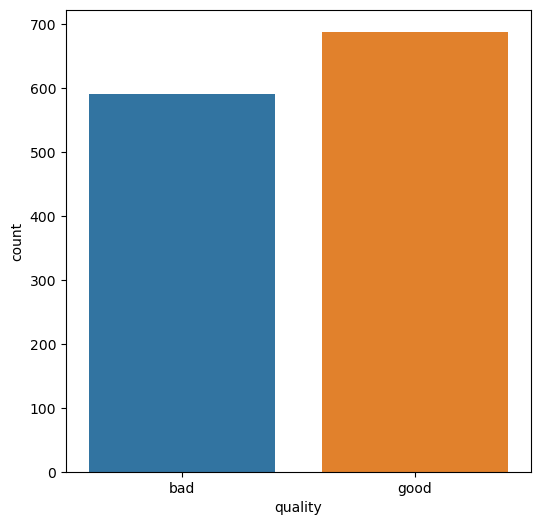

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
             ColumnName  OutlierPercentage
0   free_sulfur_dioxide           1.876466
1  total_sulfur_dioxide           3.518374
2             chlorides           6.254887
3               density           2.658327
4         fixed_acidity           3.205629
5               alcohol           0.781861
6        residual_sugar           9.382330
7             sulphates           3.831118
8                    pH           2.189210
9           citric_acid           0.078186


fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
8.4,0.25,0.39,2.0,0.041,4.0,10.0,0.99386,3.27,0.71,12.5,good
10.5,0.24,0.47,2.1,0.066,6.0,24.0,0.9978,3.15,0.9,11.0,good
10.5,0.28,0.51,1.7,0.08,10.0,24.0,0.9982,3.2,0.89,9.4,good
8.6,0.37,0.65,6.4,0.08,3.0,8.0,0.99817,3.27,0.58,11.0,bad
8.2,0.35,0.33,2.4,0.076,11.0,47.0,0.99599,3.27,0.81,11.0,good
8.2,0.28,0.6,3.0,0.104,10.0,22.0,0.99828,3.39,0.68,10.6,bad
7.4,0.36,0.29,2.6,0.087,26.0,72.0,0.99645,3.39,0.68,11.0,bad
7.4,0.55,0.19,1.8,0.082,15.0,34.0,0.99655,3.49,0.68,10.5,bad
9.0,0.66,0.17,3.0,0.077,5.0,13.0,0.9976,3.29,0.55,10.4,bad
9.0,0.46,0.31,2.8,0.093,19.0,98.0,0.99815,3.32,0.63,9.5,good


Remaining Rows in the data: 1129                                                        
Remaining Columns in the data: 12


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719263560175580"'- 1/21


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Proceeding with default option for missing value imputation.                             
Proceeding with default option for handling remaining missing values.                    


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


No information provided for Variable-Width Transformation.                               
Skipping customized string manipulation.⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾｜ 23% - 5/21


AutoML will proceed with default encoding technique.                                     


Analysis completed. No categorical columns were found.                                   


Skipping customized mathematical transformation.                                         


Skipping customized non-linear transformation.                                           


Skipping customized anti-select columns.                                                 


Training size : 0.7                                                                       
Testing size  : 0.3                                                                       


free_sulfur_dioxide,volatile_acidity,total_sulfur_dioxide,id,density,alcohol,chlorides,pH,sulphates,residual_sugar,citric_acid,fixed_acidity,quality
3.0,0.37,8.0,13,0.99817,11.0,0.08,3.27,0.58,6.4,0.65,8.6,0
4.0,0.25,10.0,12,0.99386,12.5,0.041,3.27,0.71,2.0,0.39,8.4,1
4.0,0.28,10.0,39,0.99356,12.8,0.052,3.33,0.7,2.4,0.4,8.2,1
17.0,0.415,43.0,9,1.0014,10.0,0.085,3.06,0.8,2.9,0.68,13.7,1
15.0,0.55,34.0,19,0.99655,10.5,0.082,3.49,0.68,1.8,0.19,7.4,0
47.0,0.39,133.0,47,0.9979,9.8,0.099,3.38,0.99,2.3,0.49,8.2,0
6.0,0.24,24.0,10,0.9978,11.0,0.066,3.15,0.9,2.1,0.47,10.5,1
10.0,0.28,24.0,18,0.9982,9.4,0.08,3.2,0.89,1.7,0.51,10.5,1
5.0,0.5,14.0,8,1.0002,9.6,0.089,3.19,0.44,2.2,0.49,12.3,0
5.0,0.38,12.0,49,0.99605,11.4,0.106,3.36,0.55,2.3,0.57,7.5,1


free_sulfur_dioxide,volatile_acidity,total_sulfur_dioxide,id,density,alcohol,chlorides,pH,sulphates,residual_sugar,citric_acid,fixed_acidity,quality
22.0,0.69,91.0,48,0.9979,10.1,0.088,3.29,0.62,2.5,0.32,9.7,0
19.0,0.46,98.0,22,0.99815,9.5,0.093,3.32,0.63,2.8,0.31,9.0,1
19.0,0.49,133.0,29,0.9972,9.8,0.11,2.93,1.98,2.0,0.29,8.6,0
14.0,0.47,28.0,21,0.99516,11.2,0.055,3.18,0.8,2.3,0.27,8.6,0
4.0,0.53,12.0,27,0.99702,9.2,0.165,3.26,0.86,1.9,0.12,7.4,0
16.0,0.745,63.0,36,0.9965,9.6,0.09,3.19,0.82,1.9,0.11,8.4,0
23.0,0.34,36.0,20,0.99392,12.4,0.072,3.11,0.78,2.1,0.42,8.4,1
17.0,0.63,91.0,33,0.99616,9.8,0.083,3.26,0.58,2.0,0.27,7.5,1
15.0,0.4,54.0,32,1.0,10.2,0.092,3.03,0.66,2.0,0.52,12.1,0
15.0,0.705,63.0,41,0.9964,9.5,0.36,3.0,1.59,1.8,0.24,7.5,0


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
             ColumnName  OutlierPercentage
0                    id           9.920283
1                    pH           9.388840
2             chlorides           9.831709
3   free_sulfur_dioxide           7.705934
4      volatile_acidity           9.477414
5  total_sulfur_dioxide           8.591674
6           citric_acid           4.960142
7               density           9.920283
8         fixed_acidity           9.300266
9        residual_sugar           9.743136
result data stored in tabl

['free_sulfur_dioxide', 'volatile_acidity', 'total_sulfur_dioxide', 'density', 'alcohol', 'chlorides', 'pH', 'sulphates', 'residual_sugar', 'citric_acid', 'fixed_acidity']


['free_sulfur_dioxide', 'volatile_acidity', 'total_sulfur_dioxide', 'density', 'alcohol', 'chlorides', 'pH', 'sulphates', 'residual_sugar', 'citric_acid', 'fixed_acidity']


quality,id,free_sulfur_dioxide,volatile_acidity,total_sulfur_dioxide,density,alcohol,chlorides,pH,sulphates,residual_sugar,citric_acid,fixed_acidity
1,10,-0.9469832311593162,-1.5305312969962683,-0.6898738716051849,0.5888606784345118,0.5578889665874601,-0.43459550887968174,-1.020693704829492,1.372653069112132,-0.33568471404171424,0.9623417605147321,1.219069855157542
1,12,-1.144491838030533,-1.475767373659333,-1.139079717278403,-1.5886507024087462,1.9665323789770186,-0.8781597900377234,-0.2398214563497408,0.27402228263145756,-0.5012527843820742,0.5521633052133705,0.02154110455363119
1,17,-0.156948803674449,0.27667817312259135,-0.5936154761037811,-0.4719781994122068,-0.005568398368362888,-0.026516370214283505,-0.04460339422980449,-0.41984979304054704,0.49215563766008447,-1.0372782090794064,-0.49168550284804513
1,18,-0.5519660174168826,-1.3114756036485276,-0.6898738716051849,0.812195179033795,-0.9446640066280685,-0.1861995114311784,-0.6953302679629275,1.3148303961394647,-0.9979569954031535,1.1674309881654132,1.219069855157542
1,26,-0.9469832311593162,-1.5305312969962683,-0.7540461352727875,0.4771934281348703,0.3700698449355197,-0.23942722517014345,-0.6302575805896163,2.2399931637021377,-0.8323889250627936,0.705980225951381,1.219069855157542
0,28,-0.5519660174168826,0.22191424978565674,-0.7540461352727875,0.4771934281348703,-0.7568448849761281,-0.15071436893853504,-0.5651848932163023,-1.2871898876305525,-0.5012527843820742,-1.2423674367300872,0.02154110455363119
0,19,-0.05819450023884059,0.16715032644872155,-0.369012553267172,-0.0811428233633994,0.08834116245760734,-0.15071436893853504,1.191777665863136,0.10055426371345687,-0.8323889250627936,-0.473282833040034,-0.5487106814482312
0,11,1.0281028375528518,-0.8733642169530466,0.850260456417277,-0.19281007366310293,0.5578889665874601,-0.06200151270692687,0.5410507921300103,0.10055426371345687,0.49215563766008447,0.03944023608666812,-0.5487106814482312
1,9,0.1393141066323762,-0.5721626385999032,-0.08023736676296041,2.5988711838283076,-0.3812066416722455,-0.09748665519956999,-1.6063478911893037,0.7944263393854615,0.9888598486811635,2.039060205680807,3.043875570363501
0,8,-1.0457375345949245,-0.10666929023595442,-1.0107351899431978,1.9288676820303343,-0.7568448849761281,-0.026516370214283505,-0.7604029553362415,-1.2871898876305525,-0.17011664370135438,1.0648863743400727,2.245523069960895


quality,id,free_sulfur_dioxide,volatile_acidity,total_sulfur_dioxide,density,alcohol,chlorides,pH,sulphates,residual_sugar,citric_acid,fixed_acidity
1,119,-0.9469832311593162,-1.1471838336377223,-1.139079717278403,-0.7511463251613727,0.7457080882394006,-0.576536078850255,0.020469293143509544,0.10055426371345687,-0.17011664370135438,0.6034356121260408,-0.09250925264674188
1,225,0.4355770169392014,0.05762247977485116,-0.048151234929159126,-0.13697644851322016,0.2761602841095478,-0.07974408395324856,0.4759781047566962,-0.41984979304054704,0.49215563766008447,-1.139822822904747,-0.49168550284804513
0,80,1.2256114444240687,-1.092419910300787,1.2032079065890913,0.9238624293334365,-0.7568448849761281,0.06219648601732491,-0.17474876897642966,0.9100716853307951,0.3265875673197246,1.321247908903424,0.7628684263560517
1,241,-0.9469832311593162,-0.4900167535945005,-1.0749074536108003,-0.9744808257606558,1.0274367707173129,-0.5055657938649685,0.8664142289965717,0.33184495560412464,-0.17011664370135438,0.09071254299933838,-0.49168550284804513
1,292,-0.5519660174168826,-0.2161971369098248,-0.8823906626079927,0.03052442693624215,0.7457080882394006,-0.026516370214283505,0.41090541738338504,0.10055426371345687,5.293629677530517,-1.0885505159920765,-0.6627610386486037
0,277,-0.9469832311593162,0.33144209645952655,-0.27275415776576817,1.3705314305320646,-0.3812066416722455,-0.3281400814017519,-1.6714205785626177,-0.5933178119585477,0.3265875673197246,1.9365155918554666,2.0174223555601496
0,185,-0.9469832311593162,1.289810754855892,-1.0749074536108003,-0.025309198213578625,-0.6629353241501579,-0.11522922644589167,0.21568735526344585,-0.9980765227672175,-0.666820854722434,-1.4474566643807683,-0.49168550284804513
0,76,-0.4532117139812742,0.5504977898072673,2.0053612024341234,-0.19281007366310293,-0.569025763324186,-0.11522922644589167,-1.020693704829492,-0.015091082231877335,-0.17011664370135438,-0.9860059021667362,0.02154110455363119
0,54,1.2256114444240687,-0.3257249835836949,1.8770166750989183,0.8680288041836157,-1.1324831282800107,0.026711343524681543,-1.3460571416960534,-0.5933178119585477,0.8232917783408036,-0.26819360538935305,0.3636921761547484
1,82,-0.9469832311593162,-0.5995446002683709,0.04810716057224475,2.5988711838283076,0.3700698449355197,-0.026516370214283505,-1.931711328055868,0.8522490123581286,2.478972481744401,1.7826986711174557,3.2149511061640603


['free_sulfur_dioxide', 'volatile_acidity', 'total_sulfur_dioxide', 'density', 'alcohol', 'chlorides', 'pH', 'sulphates', 'residual_sugar', 'citric_acid', 'fixed_acidity']


['r_free_sulfur_dioxide', 'r_volatile_acidity', 'r_total_sulfur_dioxide', 'r_density', 'r_alcohol', 'r_chlorides', 'r_pH', 'r_sulphates', 'r_residual_sugar', 'r_citric_acid', 'r_fixed_acidity']


quality,id,r_free_sulfur_dioxide,r_volatile_acidity,r_total_sulfur_dioxide,r_density,r_alcohol,r_chlorides,r_pH,r_sulphates,r_residual_sugar,r_citric_acid,r_fixed_acidity
1,10,-0.9469832311593162,-1.5305312969962683,-0.6898738716051849,0.5888606784345118,0.5578889665874601,-0.43459550887968174,-1.020693704829492,1.372653069112132,-0.33568471404171424,0.9623417605147321,1.219069855157542
1,12,-1.144491838030533,-1.475767373659333,-1.139079717278403,-1.5886507024087462,1.9665323789770186,-0.8781597900377234,-0.2398214563497408,0.27402228263145756,-0.5012527843820742,0.5521633052133705,0.02154110455363119
1,17,-0.156948803674449,0.27667817312259135,-0.5936154761037811,-0.4719781994122068,-0.005568398368362888,-0.026516370214283505,-0.04460339422980449,-0.41984979304054704,0.49215563766008447,-1.0372782090794064,-0.49168550284804513
1,18,-0.5519660174168826,-1.3114756036485276,-0.6898738716051849,0.812195179033795,-0.9446640066280685,-0.1861995114311784,-0.6953302679629275,1.3148303961394647,-0.9979569954031535,1.1674309881654132,1.219069855157542
1,26,-0.9469832311593162,-1.5305312969962683,-0.7540461352727875,0.4771934281348703,0.3700698449355197,-0.23942722517014345,-0.6302575805896163,2.2399931637021377,-0.8323889250627936,0.705980225951381,1.219069855157542
0,28,-0.5519660174168826,0.22191424978565674,-0.7540461352727875,0.4771934281348703,-0.7568448849761281,-0.15071436893853504,-0.5651848932163023,-1.2871898876305525,-0.5012527843820742,-1.2423674367300872,0.02154110455363119
0,19,-0.05819450023884059,0.16715032644872155,-0.369012553267172,-0.0811428233633994,0.08834116245760734,-0.15071436893853504,1.191777665863136,0.10055426371345687,-0.8323889250627936,-0.473282833040034,-0.5487106814482312
0,11,1.0281028375528518,-0.8733642169530466,0.850260456417277,-0.19281007366310293,0.5578889665874601,-0.06200151270692687,0.5410507921300103,0.10055426371345687,0.49215563766008447,0.03944023608666812,-0.5487106814482312
1,9,0.1393141066323762,-0.5721626385999032,-0.08023736676296041,2.5988711838283076,-0.3812066416722455,-0.09748665519956999,-1.6063478911893037,0.7944263393854615,0.9888598486811635,2.039060205680807,3.043875570363501
0,8,-1.0457375345949245,-0.10666929023595442,-1.0107351899431978,1.9288676820303343,-0.7568448849761281,-0.026516370214283505,-0.7604029553362415,-1.2871898876305525,-0.17011664370135438,1.0648863743400727,2.245523069960895


quality,id,r_free_sulfur_dioxide,r_volatile_acidity,r_total_sulfur_dioxide,r_density,r_alcohol,r_chlorides,r_pH,r_sulphates,r_residual_sugar,r_citric_acid,r_fixed_acidity
1,119,-0.9469832311593162,-1.1471838336377223,-1.139079717278403,-0.7511463251613727,0.7457080882394006,-0.576536078850255,0.020469293143509544,0.10055426371345687,-0.17011664370135438,0.6034356121260408,-0.09250925264674188
1,225,0.4355770169392014,0.05762247977485116,-0.048151234929159126,-0.13697644851322016,0.2761602841095478,-0.07974408395324856,0.4759781047566962,-0.41984979304054704,0.49215563766008447,-1.139822822904747,-0.49168550284804513
0,80,1.2256114444240687,-1.092419910300787,1.2032079065890913,0.9238624293334365,-0.7568448849761281,0.06219648601732491,-0.17474876897642966,0.9100716853307951,0.3265875673197246,1.321247908903424,0.7628684263560517
1,241,-0.9469832311593162,-0.4900167535945005,-1.0749074536108003,-0.9744808257606558,1.0274367707173129,-0.5055657938649685,0.8664142289965717,0.33184495560412464,-0.17011664370135438,0.09071254299933838,-0.49168550284804513
1,292,-0.5519660174168826,-0.2161971369098248,-0.8823906626079927,0.03052442693624215,0.7457080882394006,-0.026516370214283505,0.41090541738338504,0.10055426371345687,5.293629677530517,-1.0885505159920765,-0.6627610386486037
0,277,-0.9469832311593162,0.33144209645952655,-0.27275415776576817,1.3705314305320646,-0.3812066416722455,-0.3281400814017519,-1.6714205785626177,-0.5933178119585477,0.3265875673197246,1.9365155918554666,2.0174223555601496
0,185,-0.9469832311593162,1.289810754855892,-1.0749074536108003,-0.025309198213578625,-0.6629353241501579,-0.11522922644589167,0.21568735526344585,-0.9980765227672175,-0.666820854722434,-1.4474566643807683,-0.49168550284804513
0,76,-0.4532117139812742,0.5504977898072673,2.0053612024341234,-0.19281007366310293,-0.569025763324186,-0.11522922644589167,-1.020693704829492,-0.015091082231877335,-0.17011664370135438,-0.9860059021667362,0.02154110455363119
0,54,1.2256114444240687,-0.3257249835836949,1.8770166750989183,0.8680288041836157,-1.1324831282800107,0.026711343524681543,-1.3460571416960534,-0.5933178119585477,0.8232917783408036,-0.26819360538935305,0.3636921761547484
1,82,-0.9469832311593162,-0.5995446002683709,0.04810716057224475,2.5988711838283076,0.3700698449355197,-0.026516370214283505,-1.931711328055868,0.8522490123581286,2.478972481744401,1.7826986711174557,3.2149511061640603


['free_sulfur_dioxide', 'volatile_acidity', 'total_sulfur_dioxide', 'density', 'alcohol', 'chlorides', 'pH', 'sulphates', 'residual_sugar', 'citric_acid', 'fixed_acidity']


quality,id,free_sulfur_dioxide,volatile_acidity,total_sulfur_dioxide,density,alcohol,chlorides,pH,sulphates,residual_sugar,citric_acid,fixed_acidity
1,101,-1.2432461414661424,-1.1198018719692537,-1.267424244613607,-0.9083190758339079,1.4030752360743814,-0.20394208267749958,-0.23982145634972063,0.0427315907407897,-0.17011664370135843,0.6034356121260417,0.1355914617540135
0,78,-0.6507203208524915,1.6457762565459704,-0.7219600034389856,0.9232147079031258,-0.5690257929479325,-0.02651637021428301,0.5410507921300306,-0.18855910114987834,0.4921556376600791,-0.729644367603383,0.3636921761547588
1,99,-0.6507203208524915,-0.928128140289981,-0.6257016079375819,-1.1428447432636402,1.4030752360743814,-0.3991103663870378,0.34583273001009135,-0.36202712006787935,0.16101949697935997,0.2445294637373504,-0.5487106814482214
0,1020,-0.15694880367444913,0.6600256364811382,-0.4652709487685755,0.08003909404861943,-0.5690257929479325,-0.1684569401848562,1.8425045395962796,-0.015091082231877311,-0.8323889250627963,-0.37073821921469186,-1.1189624674500842
0,103,1.1268571409884611,-0.4900167535944998,-0.01606510309535782,-0.4001801297361443,-0.09947792889500054,-0.1684569401848562,-0.3699668310963458,-0.7089631579038808,-1.163525065743515,0.039440236086669515,-0.09250925264673183
0,780,1.1268571409884611,-0.4900167535944998,0.17645168790744978,-0.22707785139512338,-0.005568356084414481,-0.15071436893853452,1.1917776658631565,-0.13073642817721134,-0.8323889250627963,-0.5758274468653725,-0.7197862172487807
1,305,0.43557701693920176,0.3314420964595271,-0.4652709487685755,-1.0646695207871042,-0.19338750170558827,-0.558793507603933,1.2568503532364677,-0.13073642817721134,-0.6668208547224371,-1.037278209079404,-1.689214253451947
1,1178,0.43557701693920176,-1.366239526985462,-0.5936154761037806,-0.7184649641050622,0.7457082264002757,0.16865191349525546,-1.0206937048294717,0.15837693668612307,-0.5012527843820775,0.5521633052133714,0.24964181895438667
0,1066,-0.3544574105456661,-1.2567116803115919,-0.27275415776576795,0.085623038511207,-0.8507545113796924,0.3993053396974371,-0.3699668310963458,-0.4776724660132134,-1.163525065743515,1.2187032950780838,0.19261664035419956
1,996,-0.3544574105456661,-0.7090724469422403,0.2406239515750523,-2.125618968683518,1.6848039545061397,-0.7894469338061145,0.34583273001009135,-0.24638177412254536,1.6511321300425945,0.2445294637373504,-1.1189624674500842


quality,id,free_sulfur_dioxide,volatile_acidity,total_sulfur_dioxide,density,alcohol,chlorides,pH,sulphates,residual_sugar,citric_acid,fixed_acidity
0,21,-0.15694880367444913,-0.27096106024675937,-0.5615293442699794,-0.8859832979834336,0.7457082264002757,-0.6297637925892196,-0.8254756427095326,0.7944263393854601,-0.0045485733609996045,-0.06310437773867066,0.1355914617540135
0,48,0.6330856238104188,0.9338452531658136,1.4598969612595003,0.6440174847725069,-0.28729707451617437,-0.04425894146060469,-0.10967608160309543,-0.24638177412254536,0.3265875673197195,0.19325715682468017,0.7628684263560623
1,56,-0.2557031071100576,-1.1471838336377214,-0.40109868510097296,0.867375263277002,-0.3812066473267604,-0.5055657938649679,-0.23982145634972063,-0.015091082231877311,-1.163525065743515,0.9623417605147326,0.7628684263560623
0,27,-1.144491838030534,0.057622479774851756,-1.0749074536107996,0.15263037206256796,-1.1324832298114522,1.3219190445061637,-0.30489414372303464,1.1413623772214616,-0.6668208547224371,-0.8321889814287234,-0.5487106814482214
1,15,-0.4532117139812746,-0.928128140289981,0.048107160572244706,-0.4225159075865566,0.5578890807791036,-0.2571697964164646,-0.23982145634972063,0.8522490123581272,0.16101949697935997,0.2445294637373504,-0.09250925264673183
1,16,1.2256114444240696,-1.366239526985462,0.016021028738443445,1.4257697095383017,-0.19338750170558827,-0.20394208267749958,-0.6953302679629074,0.7944263393854601,1.3199959893618762,1.0648863743400732,2.2455230699609063
0,32,-0.05819450023884064,-0.6543085236053051,0.27271008340885355,1.8166458219212303,-0.19338750170558827,0.026711343524682032,-1.801565953309223,-0.015091082231877311,-0.5012527843820775,1.2187032950780838,2.1314727127605333
0,41,-0.05819450023884064,1.0159911381712163,0.5614852699130649,-0.1935741846194739,-0.8507545113796924,4.781720437538888,-1.9967840154291594,5.36241750422615,-0.8323889250627963,-0.21692129847668132,-0.49168550284803536
1,20,0.7318399272460272,-0.9828920636269158,-0.3048402895995692,-1.5783924113474552,1.8726231001273135,-0.3281400814017513,-1.2809844543227222,0.6787809934401262,-0.335684714041718,0.7059802259513819,0.02154110455364134
1,33,0.13931410663237634,0.605261713144203,1.4598969612595003,-0.32758885172213376,-0.5690257929479325,-0.13297179769221285,-0.30489414372303464,-0.4776724660132134,-0.5012527843820775,-0.06310437773867066,-0.49168550284803536


['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8']


                                                                                          
Completed customized hyperparameter update.


response_column : quality                                                                                                                             
name : xgboost
model_type : Classification
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1, 0.2)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.1, 0.3)
max_depth : (5, 6, 8, 10)
min_node_size : (1, 2, 3)
iter_num : (10, 20, 30)
seed : 42
Total number of models for xgboost : 2592
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : quality
name : knn
model_type : Classification
k : (2, 3, 5, 6, 8, 10, 12)
id_column : id
voting_weight : 1.0
Total number of models for knn : 7
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719264812191785"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719263713140976"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719263938600385"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719263725930201"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719264513536682"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719263328671277"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719265006997242"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719264725611147"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719264035293759"'


,Rank,Model-ID,Feature-Selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,DECISIONFOREST_3,lasso,0.746313,0.746313,0.746313,0.746313,0.748830,0.749004,0.746310,0.751613,0.746313,0.746357
1,2,KNN_9,lasso,0.716814,0.716814,0.716814,0.716814,0.716518,0.713522,0.714105,0.716656,0.716814,0.715829
2,3,XGBOOST_2,pca,0.707965,0.707965,0.707965,0.707965,0.710048,0.702621,0.702961,0.709395,0.707965,0.705349
3,4,XGBOOST_0,lasso,0.705015,0.705015,0.705015,0.705015,0.706115,0.700210,0.700636,0.705736,0.705015,0.702879
4,5,XGBOOST_3,lasso,0.705015,0.705015,0.705015,0.705015,0.706115,0.700210,0.700636,0.705736,0.705015,0.702879
5,6,XGBOOST_1,rfe,0.705015,0.705015,0.705015,0.705015,0.706115,0.700210,0.700636,0.705736,0.705015,0.702879
6,7,DECISIONFOREST_2,pca,0.690265,0.690265,0.690265,0.690265,0.699996,0.695860,0.689574,0.703852,0.690265,0.688666
7,8,KNN_4,rfe,0.660767,0.660767,0.660767,0.660767,0.659266,0.658543,0.658760,0.660283,0.660767,0.660381
8,9,KNN_0,lasso,0.660767,0.660767,0.660767,0.660767,0.659266,0.658543,0.658760,0.660283,0.660767,0.660381
9,10,KNN_8,pca,0.651917,0.651917,0.651917,0.651917,0.650743,0.650943,0.650821,0.652194,0.651917,0.652033


In [17]:
# Fitting train data
aml.fit(wine_df_train, wine_df_train.quality)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [18]:
# Fetching Leaderboard
aml.leaderboard()

,Rank,Model-ID,Feature-Selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,DECISIONFOREST_3,lasso,0.746313,0.746313,0.746313,0.746313,0.748830,0.749004,0.746310,0.751613,0.746313,0.746357
1,2,KNN_9,lasso,0.716814,0.716814,0.716814,0.716814,0.716518,0.713522,0.714105,0.716656,0.716814,0.715829
2,3,XGBOOST_2,pca,0.707965,0.707965,0.707965,0.707965,0.710048,0.702621,0.702961,0.709395,0.707965,0.705349
3,4,XGBOOST_0,lasso,0.705015,0.705015,0.705015,0.705015,0.706115,0.700210,0.700636,0.705736,0.705015,0.702879
4,5,XGBOOST_3,lasso,0.705015,0.705015,0.705015,0.705015,0.706115,0.700210,0.700636,0.705736,0.705015,0.702879
5,6,XGBOOST_1,rfe,0.705015,0.705015,0.705015,0.705015,0.706115,0.700210,0.700636,0.705736,0.705015,0.702879
6,7,DECISIONFOREST_2,pca,0.690265,0.690265,0.690265,0.690265,0.699996,0.695860,0.689574,0.703852,0.690265,0.688666
7,8,KNN_4,rfe,0.660767,0.660767,0.660767,0.660767,0.659266,0.658543,0.658760,0.660283,0.660767,0.660381
8,9,KNN_0,lasso,0.660767,0.660767,0.660767,0.660767,0.659266,0.658543,0.658760,0.660283,0.660767,0.660381
9,10,KNN_8,pca,0.651917,0.651917,0.651917,0.651917,0.650743,0.650943,0.650821,0.652194,0.651917,0.652033


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [19]:
# Fetching best performing model for dataset
aml.leader()

,Rank,Model-ID,Feature-Selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,DECISIONFOREST_3,lasso,0.746313,0.746313,0.746313,0.746313,0.74883,0.749004,0.74631,0.751613,0.746313,0.746357


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

In [22]:
# Generating prediction and metrics on test data
prediction = aml.predict(wine_df_test,3)

Data Transformation started ...


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719265245513884"'⫾⫾⫾｜ 13% - 2/15


free_sulfur_dioxide,volatile_acidity,total_sulfur_dioxide,id,density,alcohol,chlorides,pH,sulphates,residual_sugar,citric_acid,fixed_acidity,quality
16.0,0.62,37.0,242,0.9972,10.7,0.088,3.31,0.58,2.7,0.33,8.0,1
9.0,0.64,17.0,287,0.99496,10.6,0.066,3.52,0.78,1.9,0.05,6.0,0
9.0,0.58,104.0,30,0.99779,9.7,0.075,3.23,0.57,2.8,0.25,9.0,0
50.0,0.63,110.0,17,0.9983,9.4,0.111,3.26,0.77,5.1,0.12,7.5,0
55.0,0.54,95.0,359,1.00369,9.0,0.214,3.18,0.77,15.4,0.37,10.2,1
12.0,0.695,20.0,132,0.99546,10.1,0.076,3.29,0.54,2.0,0.13,7.2,0
20.0,0.6,110.0,191,0.99914,10.2,0.068,3.3,1.17,4.5,0.3,7.0,0
20.0,0.34,78.0,343,0.9992,10.0,0.078,3.19,0.7,3.2,0.49,10.6,1
3.0,0.38,11.0,223,0.99577,13.2,0.132,3.23,0.57,3.8,0.48,9.3,1
3.0,0.395,10.0,420,0.99639,12.2,0.094,3.27,0.64,4.6,0.46,9.4,1


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719265794656251"'⫾⫾⫾｜ 73% - 11/15


id,free_sulfur_dioxide,volatile_acidity,total_sulfur_dioxide,density,alcohol,chlorides,pH,sulphates,residual_sugar,citric_acid,fixed_acidity,quality
266,10.0,0.33,19.0,0.9947,12.0,0.063,3.3,0.73,3.3,0.38,8.7,1
298,10.0,0.34,21.0,1.0,9.2,0.066,3.12,1.18,2.4,0.5,12.2,1
121,10.0,0.35,37.0,1.0003,11.0,0.07,3.32,0.91,3.3,0.49,11.5,1
391,10.0,0.36,41.0,0.998,12.5,0.122,3.23,0.66,2.9,0.64,10.2,1
319,10.0,0.38,41.0,1.001,9.8,0.088,3.17,0.68,2.6,0.66,12.6,1
64,7.0,0.55,17.0,0.9966,9.4,0.07,3.26,0.64,1.7,0.0,7.8,1
59,14.0,0.39,67.0,0.9972,9.2,0.082,3.34,0.55,2.0,0.48,7.4,0
214,8.0,0.7,16.0,0.9933,12.6,0.067,3.43,0.52,3.75,0.08,6.7,0
139,8.0,0.775,86.0,0.9959,9.5,0.092,3.23,0.59,1.9,0.42,7.7,0
51,8.0,0.64,23.0,0.9961,9.6,0.1,3.3,0.58,1.8,0.07,7.4,0


quality,id,free_sulfur_dioxide,volatile_acidity,total_sulfur_dioxide,density,alcohol,chlorides,pH,sulphates,residual_sugar,citric_acid,fixed_acidity
0,139,-0.7494746242880994,1.3993386015297622,1.299466302090495,-0.4719781994122068,-0.8507544458020982,0.026711343524681543,-0.5001122058429912,-0.41984979304054704,-0.666820854722434,0.705980225951381,-0.3776351456476726
0,48,0.9293485341172434,1.9743597965675812,0.6898297972482705,0.03052442693624215,-0.569025763324186,0.13316677100261165,-0.6953302679629275,0.10055426371345687,0.49215563766008447,-1.4474566643807683,-0.3206099670474865
0,263,0.9293485341172434,0.49573386647033213,1.3315524339242963,1.7055331814310513,-0.6629353241501579,-0.008773798967961823,-0.43503951846967714,-0.24638177412254575,1.8167002003829622,-0.11437668465134239,0.5347677119553075
0,228,1.620628658166502,0.38620601979646174,0.8181743245834757,1.9288676820303343,-0.569025763324186,0.20413705598789814,0.020469293143509544,0.27402228263145756,1.8167002003829622,-1.0885505159920765,0.8769187835564247
0,130,2.2131544787801523,-1.8591148370178792,0.6898297972482705,-0.41614457426238605,0.8396176490653725,-0.7362192200671501,0.15061466789013472,1.5461210880301333,-0.17011664370135438,0.6034356121260408,-0.2635847884473
0,274,0.830594230681635,1.7553041032198404,-0.4010986851009733,-0.7511463251613727,-0.6629353241501579,-0.4523380801260034,-0.2398214563497408,-0.6511404849312148,-1.4946612064242328,-1.4474566643807683,0.1926166403541893
1,468,1.4231200512952853,1.3719566398612946,0.9144327200848795,1.0913633047829607,-0.005568398368362888,-0.15071436893853504,-0.04460339422980449,-0.13073642817721154,0.9888598486811635,-0.8321889814287255,0.7058432477558656
1,53,-0.5519660174168826,-0.4900167535945005,-0.7219600034389863,1.817200431730693,-0.005568398368362888,0.3283350547121499,-1.020693704829492,1.0835397042487964,1.3199959893618833,1.9365155918554666,2.0174223555601496
1,266,-0.5519660174168826,-1.0376559869638518,-0.8503045307741913,-1.141981701210118,1.4969845748471657,-0.48782322261864675,-0.04460339422980449,0.38966762857679177,1.6511321300426023,0.5008909983007003,0.1926166403541893
1,364,-0.5519660174168826,-0.3804889069206301,-0.8823906626079927,0.5330270532846911,-1.0385735674540388,-0.15071436893853504,-0.5651848932163023,-0.07291375520454443,-0.666820854722434,-0.26819360538935305,0.9909691407567968


id,free_sulfur_dioxide,volatile_acidity,total_sulfur_dioxide,density,alcohol,chlorides,pH,sulphates,residual_sugar,citric_acid,fixed_acidity,quality
139,8.0,0.775,86.0,0.9959,9.5,0.092,3.23,0.59,1.9,0.42,7.7,0
48,25.0,0.88,67.0,0.9968,9.8,0.098,3.2,0.68,2.6,0.0,7.8,0
263,25.0,0.61,87.0,0.9998,9.7,0.09,3.24,0.62,3.4,0.26,9.3,0
228,32.0,0.59,71.0,1.0002,9.8,0.102,3.31,0.71,3.4,0.07,9.9,0
130,38.0,0.18,67.0,0.996,11.3,0.049,3.33,0.93,2.2,0.4,7.9,0
274,24.0,0.84,33.0,0.9954,9.7,0.065,3.27,0.55,1.4,0.0,8.7,0
468,30.0,0.77,74.0,0.9987,10.4,0.082,3.3,0.64,2.9,0.12,9.6,1
53,10.0,0.43,23.0,1.0,10.4,0.109,3.15,0.85,3.1,0.66,11.9,1
266,10.0,0.33,19.0,0.9947,12.0,0.063,3.3,0.73,3.3,0.38,8.7,1
364,10.0,0.45,18.0,0.9977,9.3,0.082,3.22,0.65,1.9,0.23,10.1,1


quality,id,r_free_sulfur_dioxide,r_volatile_acidity,r_total_sulfur_dioxide,r_density,r_alcohol,r_chlorides,r_pH,r_sulphates,r_residual_sugar,r_citric_acid,r_fixed_acidity
1,266,-0.5519660174168826,-1.0376559869638518,-0.8503045307741913,-1.141981701210118,1.4969845748471657,-0.48782322261864675,-0.04460339422980449,0.38966762857679177,1.6511321300426023,0.5008909983007003,0.1926166403541893
1,298,-0.5519660174168826,-0.9828920636269166,-0.7861322671065888,1.817200431730693,-1.1324831282800107,-0.43459550887968174,-1.2159117669494282,2.991687912346809,0.16101949697936468,1.1161586812527429,2.1884978913607074
1,121,-0.5519660174168826,-0.9281281402899817,-0.27275415776576817,1.9847013071801551,0.5578889665874601,-0.363625223894395,0.08554198051682069,1.4304757420847989,1.6511321300426023,1.0648863743400727,1.7893216411594044
1,391,-0.5519660174168826,-0.8733642169530466,-0.14440963043056299,0.7005279287341534,1.9665323789770186,0.5589884809143315,-0.5001122058429912,-0.015091082231877335,0.9888598486811635,1.833970978030126,1.047994319356983
1,319,-0.5519660174168826,-0.7638363702791762,-0.14440963043056299,2.3755366832289004,-0.569025763324186,-0.04425894146060519,-0.8905483300828667,0.10055426371345687,0.49215563766008447,1.9365155918554666,2.4165986057614526
1,64,-0.8482289277237077,0.16715032644872155,-0.914476794441794,-0.0811428233633994,-0.9446640066280685,-0.363625223894395,-0.30489414372305484,-0.13073642817721154,-0.9979569954031535,-1.4474566643807683,-0.3206099670474865
0,59,-0.156948803674449,-0.7090724469422409,0.6898297972482705,0.25385892753552525,-1.1324831282800107,-0.15071436893853504,0.21568735526344585,-0.6511404849312148,-0.5012527843820742,1.0136140674274023,-0.5487106814482312
0,214,-0.7494746242880994,0.9886091765027483,-0.9465629262755952,-1.9236524533077328,2.0604419398029887,-0.41685293763336,0.8013415416232605,-0.8246085038492161,2.3961884465742216,-1.0372782090794064,-0.947886931649535
0,139,-0.7494746242880994,1.3993386015297622,1.299466302090495,-0.4719781994122068,-0.8507544458020982,0.026711343524681543,-0.5001122058429912,-0.41984979304054704,-0.666820854722434,0.705980225951381,-0.3776351456476726
0,51,-0.7494746242880994,0.6600256364811377,-0.7219600034389863,-0.3603109491125653,-0.7568448849761281,0.168651913495255,-0.04460339422980449,-0.47767246601321417,-0.8323889250627936,-1.0885505159920765,-0.5487106814482312


quality,id,free_sulfur_dioxide,volatile_acidity,total_sulfur_dioxide,density,alcohol,chlorides,pH,sulphates,residual_sugar,citric_acid,fixed_acidity
1,266,-0.5519660174168831,-1.037655986963851,-0.8503045307741907,-1.1428447432636402,1.4969848088849675,-0.4878232226186462,-0.044603394229784266,0.3896676285767911,1.6511321300425945,0.5008909983007013,0.19261664035419956
1,298,-0.5519660174168831,-0.9828920636269158,-0.7861322671065881,1.8166458219212303,-1.1324832298114522,-0.4345955088796812,-1.2159117669494082,2.991687912346804,0.16101949697935997,1.1161586812527433,2.1884978913607194
1,121,-0.5519660174168831,-0.928128140289981,-0.27275415776576795,1.9841641557996017,0.5578890807791036,-0.36362522389439444,0.08554198051684093,1.4304757420847967,1.6511321300425945,1.0648863743400732,1.7893216411594157
1,391,-0.5519660174168831,-0.8733642169530458,-0.14440963043056287,0.6998569293986306,1.9665326729378996,0.558988480914332,-0.500112205842971,-0.015091082231877311,0.9888598486811571,1.8339709780301259,1.0479943193569938
1,319,-0.5519660174168831,-0.7638363702791754,-0.14440963043056287,2.375040268182468,-0.5690257929479325,-0.04425894146060469,-0.8905483300828466,0.10055426371345672,0.4921556376600791,1.9365155918554664,2.4165986057614646
1,64,-0.8482289277237085,0.16715032644872213,-0.9144767944417932,-0.08189529536716433,-0.9446640841902785,-0.36362522389439444,-0.30489414372303464,-0.13073642817721134,-0.9979569954031559,-1.4474566643807656,-0.32060996704747663
0,59,-0.15694880367444913,-0.7090724469422403,0.68982979724827,0.25314137238957835,-1.1324832298114522,-0.15071436893853452,0.21568735526346614,-0.6511404849312138,-0.5012527843820775,1.013614067427403,-0.5487106814482214
0,214,-0.7494746242881001,0.9886091765027487,-0.9465629262755945,-1.9245969680294972,2.0604422457484857,-0.4168529376333595,0.801341541623281,-0.8246085038492148,2.3961884465742123,-1.037278209079404,-0.9478869316495255
0,139,-0.7494746242881001,1.3993386015297626,1.299466302090494,-0.4727714077500928,-0.8507545113796924,0.026711343524682032,-0.500112205842971,-0.41984979304054637,-0.6668208547224371,0.7059802259513819,-0.3776351456476627
0,51,-0.7494746242881001,0.6600256364811382,-0.7219600034389856,-0.36109251849784524,-0.7568449385691063,0.16865191349525546,-0.044603394229784266,-0.4776724660132134,-0.8323889250627963,-1.0885505159920743,-0.5487106814482214


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,quality
0,468,0.070651,1.992987,-0.709704,-1.217654,0.906758,-0.035119,0.929707,-0.137795,0.605527,1
1,59,0.227158,0.551780,0.047791,0.172305,-1.319797,-0.271727,-1.012531,-0.345453,-0.906497,0
2,53,3.726769,-0.689627,-0.557143,-0.671163,0.709761,-0.602778,0.241240,-0.176603,-0.077571,1
3,214,-2.397710,-1.782013,-0.407402,-1.509556,2.499306,1.090237,-0.648919,0.418084,0.170664,0
4,266,0.242360,-2.081820,0.837405,-1.323975,1.050938,0.247476,-0.651463,0.620239,0.116459,1
5,139,-0.205817,0.993707,-0.527107,0.729946,-0.454097,1.290120,0.275164,-0.020257,-1.545645,0
6,364,0.908750,-0.412717,-1.056826,0.681867,-1.051605,-0.347709,0.217343,0.304358,0.570406,1
7,51,-1.109092,-0.200498,-1.116051,1.332412,-0.359242,0.239707,0.019055,0.315617,0.274951,0
8,298,3.907167,-0.466157,-0.041922,0.463881,-0.215296,-1.826473,1.306944,1.404250,0.128449,1
9,48,-0.828922,1.988586,-0.804482,0.133280,0.941219,0.780607,0.824009,0.775013,0.646117,0


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 15/15            

Following model is being used for generating prediction :
Model ID : XGBOOST_2 
Feature Selection Method : pca

Target Column Mapping:
good: 1
bad: 0

Prediction : 
    id  Prediction  Confidence_Lower  Confidence_upper  quality
0   53           1               1.0               1.0        1
1  266           1               1.0               1.0        1
2  139           0               1.0               1.0        0
3  364           0               1.0               1.0        1
4  298           1               1.0               1.0        1
5   48           1               1.0               1.0        0
6   51           0               1.0               1.0        0
7  214           1               1.0               1.0        0
8   59           0               1.0               1.0        0
9  468           1               1.0               1.0        1

Performance Metrics : 
       

AUC,GINI
0.5632851943172479,0.12657038863449577


threshold_value,tpr,fpr
0.04081632653061224,0.8143712574850299,0.3790849673202614
0.08163265306122448,0.8143712574850299,0.3790849673202614
0.1020408163265306,0.8143712574850299,0.3790849673202614
0.12244897959183673,0.8143712574850299,0.3790849673202614
0.16326530612244897,0.8143712574850299,0.3790849673202614
0.18367346938775508,0.8143712574850299,0.3790849673202614
0.14285714285714285,0.8143712574850299,0.3790849673202614
0.061224489795918366,0.8143712574850299,0.3790849673202614
0.02040816326530612,0.8143712574850299,0.3790849673202614
0.0,1.0,1.0



Confusion Matrix : 


array([[ 95,  58],
       [ 31, 136]], dtype=int64)

In [23]:
# Printing prediction
prediction.head()

id,Prediction,Confidence_Lower,Confidence_upper,quality
10,1,1.0,1.0,1
12,1,1.0,1.0,0
13,1,1.0,1.0,0
14,0,1.0,1.0,0
16,1,1.0,1.0,1
17,1,1.0,1.0,0
15,0,1.0,1.0,0
11,1,1.0,1.0,1
9,1,1.0,1.0,1
8,1,1.0,1.0,1


In [24]:
remove_context()

True